In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [96]:
image1 = cv2.imread('/home/sveta/Untitled Folder/image1.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/home/sveta/Untitled Folder/image2.jpg', cv2.IMREAD_GRAYSCALE)
image3_h = cv2.imread('/home/sveta/Untitled Folder/image3_h.jpg', cv2.IMREAD_GRAYSCALE)
image3_l = cv2.imread('/home/sveta/Untitled Folder/image3_l.jpg', cv2.IMREAD_GRAYSCALE)

In [117]:
'''Виконати 2D лінійну фільтрацію зображення з різними значеннями ядра. Провести порівняльний аналіз'''
def f_2d(image, kernel):
    kernel_h, kernel_w = np.shape(kernel)
    image = np.pad(image, 1, mode='mean')
    
    output = np.zeros((image.shape))
    
    for i in range(im_h - kernel_h):
        for j in range(im_w - kernel_w):
            i_h, j_w = i + kernel_h, j + kernel_w
            output[i, j] = np.sum(image[i:i_h, j:j_w] * kernel, axis=(0, 1))
            
    output = (output - output.min(axis=0)) / (output.max(axis=0) - output.min(axis=0))
    return output * 255

In [133]:
kernel1 = [[-3, -4, -3],[0,0,0],[-3, -4, -3]]
kernel2 = [[3, 3, 3], [0,0,0], [-3, -3, -3]]
kernel3 = [[1,0,-1], [5,0,-5], [1,0,-1]]

In [134]:
def plot(image):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(1, 4, 1)
    imgplot = plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    ax.set_title('Gray original')

    ax = fig.add_subplot(1, 4, 2)
    imgplot = plt.imshow(f_2d(image, kernel1), cmap='gray', vmin=0, vmax=255)
    ax.set_title('After applying kernel 1')

    ax = fig.add_subplot(1, 4, 3)
    imgplot = plt.imshow(f_2d(image, kernel2), cmap='gray', vmin=0, vmax=255)
    ax.set_title('After applying kernel 2')

    ax = fig.add_subplot(1, 4, 4)
    imgplot = plt.imshow(f_2d(image, kernel3), cmap='gray', vmin=0, vmax=255)
    ax.set_title('After applying kernel 3')

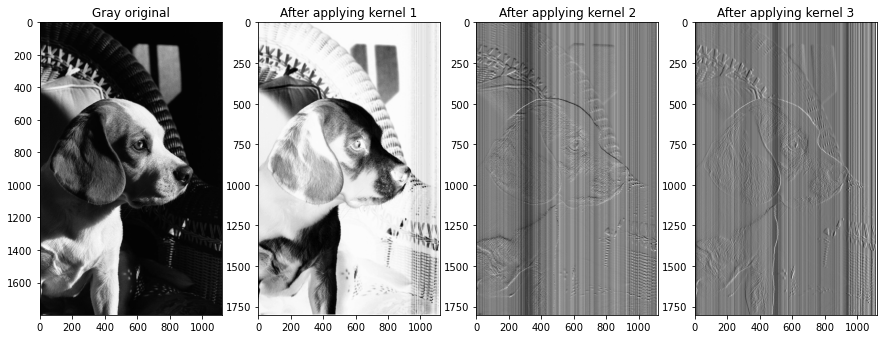

In [135]:
plot(image1)

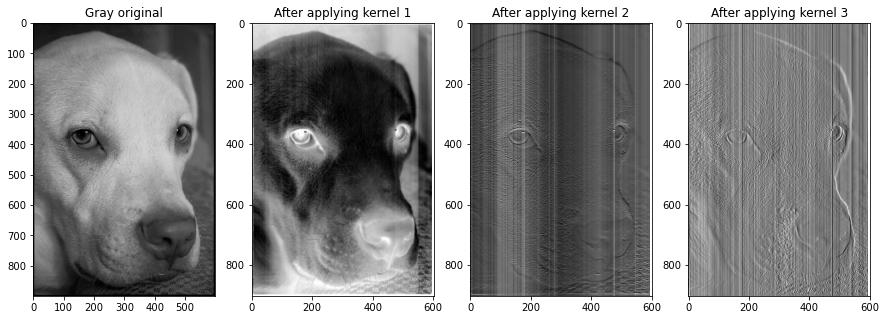

In [93]:
plot(image2)

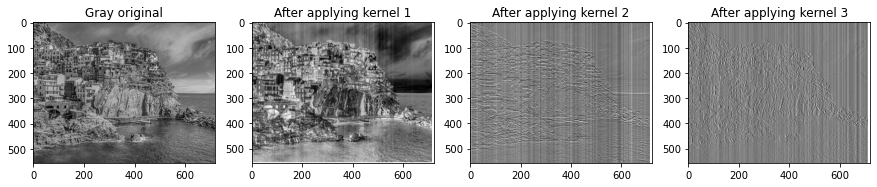

In [94]:
plot(image3_h)

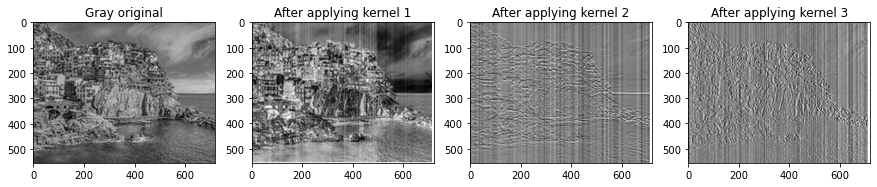

In [95]:
plot(image3_l)